In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.base import BaseEstimator , TransformerMixin,clone
from sklearn.pipeline import Pipeline 
from sklearn.preprocessing import StandardScaler,PolynomialFeatures
from sklearn.model_selection import GridSearchCV, cross_val_score , cross_val_predict , cross_validate,train_test_split,StratifiedKFold,ShuffleSplit
from sklearn.metrics import classification_report , classification,accuracy_score ,roc_auc_score
import os 
import matplotlib

In [2]:
# Loading different algorithms to ensemble 

from sklearn.ensemble import RandomForestClassifier , ExtraTreesClassifier , VotingClassifier 
from sklearn.linear_model import LogisticRegression 
from sklearn.svm import SVC 
from sklearn.tree import DecisionTreeClassifier 

In [3]:
%matplotlib inline

In [4]:
from sklearn.datasets import load_iris
data = load_iris() 
x, y  = data.data, data.target

In [10]:
from sklearn.mixture import GaussianMixture

In [12]:
y_pred = GaussianMixture(n_components= 3, random_state = 42).fit(x).predict(x)

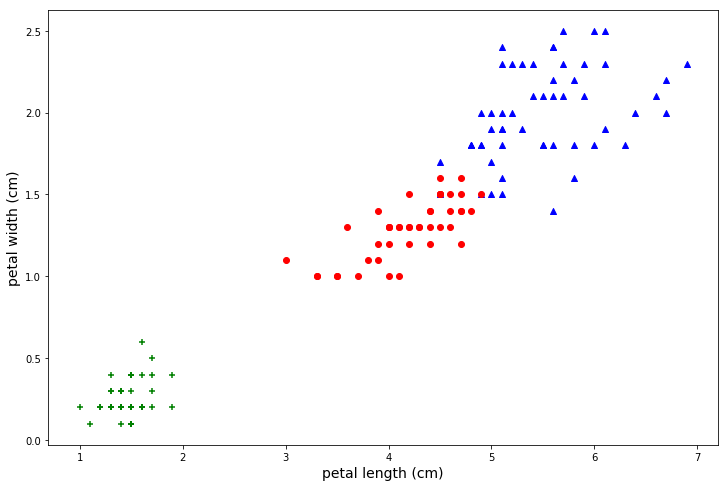

In [42]:
figure = plt.figure(figsize = (12,8))
for n , c , m in  zip(range(0,3), ('blue', 'green' , 'red'), ('^', '+', 'o')): 
    plt.scatter(x[y_pred == n, 2], x[y_pred == n, 3], c = c , marker= m)
plt.xlabel('{}'.format(data.feature_names[2]),fontsize = 14)
plt.ylabel('{}'.format(data.feature_names[3]),fontsize = 14)
plt.show()

# K - Means Clustering 

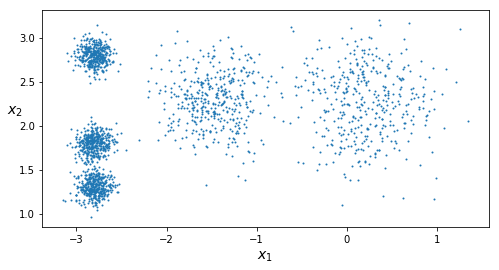

In [104]:
from sklearn.datasets import make_blobs
blob_centers = np.array(
    [[ 0.2,  2.3],
     [-1.5 ,  2.3],
     [-2.8,  1.8],
     [-2.8,  2.8],
     [-2.8,  1.3]])
blob_std = np.array([0.4, 0.3, 0.1, 0.1, 0.1])
X, y = make_blobs(n_samples=2000, centers=blob_centers,
                  cluster_std=blob_std, random_state=7)
def plot_clusters(X, y=None):
    plt.scatter(X[:, 0], X[:, 1], c=y, s=1)
    plt.xlabel("$x_1$", fontsize=14)
    plt.ylabel("$x_2$", fontsize=14, rotation=0)
    

plt.figure(figsize=(8, 4))
plot_clusters(X)
plt.show()

In [48]:
from sklearn.cluster import KMeans

In [106]:
n_clusters = 5 
kmean_clst = KMeans(n_clusters= n_clusters,random_state= 42).fit(X)

In [107]:
kmean_clst.labels_

array([4, 0, 1, ..., 2, 1, 0], dtype=int32)

In [108]:
kmean_clst.cluster_centers_

array([[-2.80389616,  1.80117999],
       [ 0.20876306,  2.25551336],
       [-2.79290307,  2.79641063],
       [-1.46679593,  2.28585348],
       [-2.80037642,  1.30082566]])

In [109]:
def plot_data (X): 
    plt.plot(X[:, 0], X[:, 1], 'r.',markersize = 2)

In [110]:
def plot_centroids(centers): 
    plt.scatter(centers[:, 0] , centers[: , 1], marker= 'o', c = 'w', linewidths= 2,alpha = 0.9
                ,s= 30,zorder = 10)
    plt.scatter(centers[:, 0] , centers[: , 1], marker= 'x', c = 'k', linewidths= 2,alpha = 1
                ,s = 50,zorder = 11)

In [135]:
def plot_decision_boundry(model , X ):
    mins = X.min(axis = 0) - 0.1 
    maxs = X.max(axis = 0) + 0.1
    xx, yy = np.meshgrid(np.linspace(mins[0], maxs[0], 1000), np.linspace(mins[1], maxs[1], 1000)) 
    Z = model.predict(np.c_[xx.ravel() , yy.ravel()]).reshape(xx.shape)
    plt.contourf(Z,extent = (mins[0] , maxs[0], mins[1],maxs[1]), cmap = 'Pastel2')
    plt.contour(Z, extent = (mins[0] , maxs[0], mins[1],maxs[1]), linewidths = 1 , colors = 'k')
    plot_data(X)
    plot_centroids(model.cluster_centers_)
    
    
        

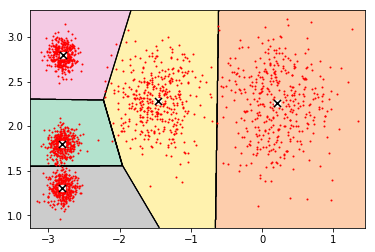

In [136]:
plot_decision_boundry(kmean_clst , X)

In [141]:
X_new = np.array([-2,1])

In [142]:
kmean_clst.transform(X_new.reshape(1,-1))

array([[1.13496186, 2.54065898, 1.96361565, 1.39202218, 0.85504298]])

In [143]:
X[0]

array([-2.69823941,  1.3454702 ])

In [144]:
kmean_clst.labels_[0]

4

In [148]:
kmeans_clst_1 = KMeans(n_clusters= 5 , random_state= 1).fit(X)
kmeans_clst_2 = KMeans(n_clusters = 5, random_state = 2).fit(X)


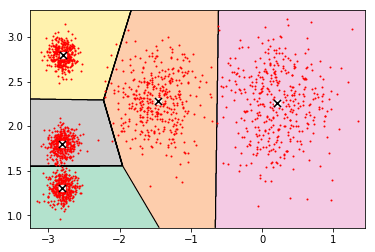

In [149]:
plot_decision_boundry(kmeans_clst_1 , X)

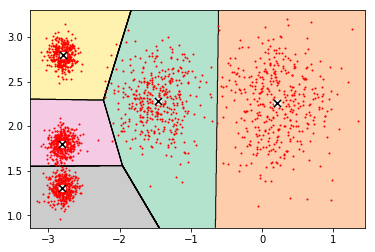

In [150]:
plot_decision_boundry(kmeans_clst_2 , X)

In [151]:
kmean_clst.inertia_

211.5985372581684

In [155]:
kmean_clst.score(X)

-211.59853725816856

Finding optimal number of clusters for K - means

Text(0,0.5,'Sum of Square (inertia)')

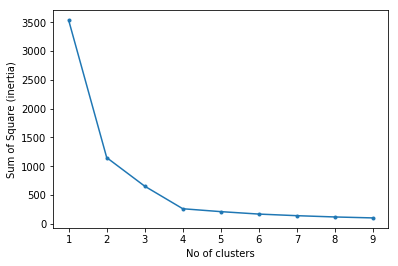

In [174]:
scee_points = dict()
for i in range(1,10): 
    model = KMeans(n_clusters= i, random_state = 42).fit(X)
    scee_points[i] = model.inertia_ 

plt.plot(scee_points.keys(),scee_points.values(), '.-')
plt.xlabel('No of clusters')
plt.ylabel('Sum of Square (inertia)')

In [175]:
from sklearn.metrics import silhouette_score

In [188]:
for i in range(1,10):
    model = KMeans(n_clusters= i, random_state= 42).fit(X)
    silhouette_score(X, model.labels_)

ValueError: Number of labels is 1. Valid values are 2 to n_samples - 1 (inclusive)

In [182]:
silhouette_score(X, )

0.655517642572828